In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [119]:
mss = pd.read_csv("mss_ms.csv.gz")
mss['rate'] = mss['fsz'] / mss['elap'] * 1000 / pow(2,20)
mss['gb'] = mss['fsz'] / pow(2,30)

In [120]:
mss.head()

,instr,ftype,start,fsz,elap,ttype,fsid,nstripe,stripe0,stripeall,rate,gb
0,amo,0,1541548440,6512513552,194000,-1,3,1,2,2,32.014520,6.065251
1,amo,0,1541548564,6512592392,318000,-1,3,1,9,9,19.531107,6.065324
2,amo,0,1541548498,5794248176,252000,-1,3,1,8,8,21.927880,5.396314
3,amo,0,1541548546,5794204604,300000,-1,3,1,3,3,18.419280,5.396274
4,amo,0,1541548558,6139385800,312000,-1,3,1,15,15,18.765944,5.717749


In [121]:
mss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125301 entries, 0 to 125300
Data columns (total 12 columns):
instr        125301 non-null object
ftype        125301 non-null int64
start        125301 non-null int64
fsz          125301 non-null int64
elap         125301 non-null int64
ttype        125301 non-null int64
fsid         125301 non-null int64
nstripe      125301 non-null int64
stripe0      125301 non-null int64
stripeall    125301 non-null int64
rate         125301 non-null float64
gb           125301 non-null float64
dtypes: float64(2), int64(9), object(1)
memory usage: 11.5+ MB


In [137]:
cutlf = (mss.gb > 5) & (mss.gb<100)

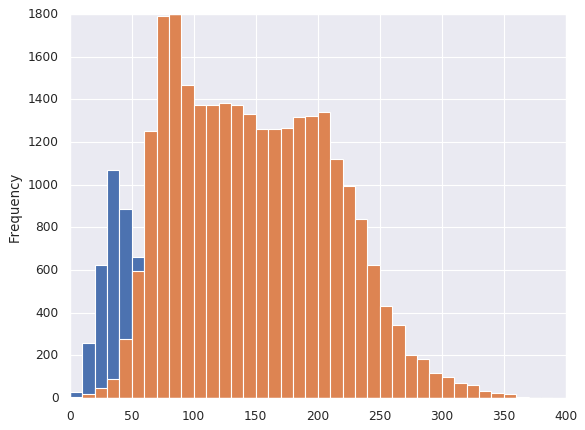

In [138]:
bins =range(0,400,10)
mss.loc[cutlf & (mss.ttype == 1)].rate.plot.hist(bins=bins)
mss.loc[cutlf & (mss.ttype == 0)].rate.plot.hist(bins=bins)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


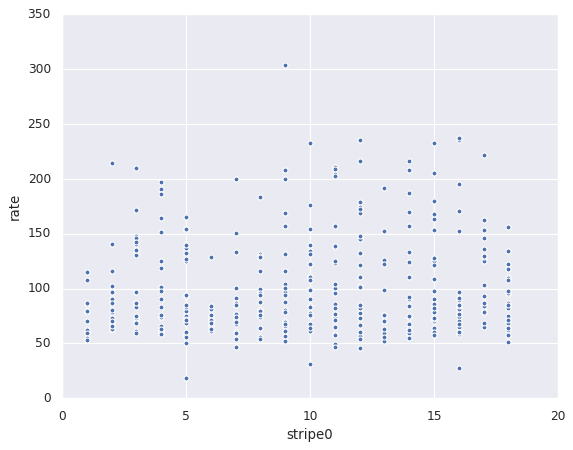

In [139]:
mss.loc[cutlf & (mss.ttype==0) & (mss.fsid == 3)].plot.scatter(x='stripe0', y='rate')

In [140]:
ostrate = mss[cutlf & (mss.ttype == 0)].groupby(['fsid','stripe0']).rate.aggregate(['count', 'min', 'max', 'mean', 'median', 'var'])
ostrate.head()

count        min         max        mean      median  \
fsid stripe0                                                         
2    1          604  22.400393  338.347877  148.017020  142.403342   
     2          622  23.885822  328.910158  147.441657  143.143250   
     3          586  36.139094  352.693127  148.465423  141.613090   
     4          567  21.240663  346.678033  153.594784  146.944365   
     5          537  33.439072  314.697656  151.591238  147.547324   

                      var  
fsid stripe0               
2    1        3822.209692  
     2        4000.532259  
     3        4354.360538  
     4        4096.946915  
     5        3865.757831

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec06412a20>,
      dtype=object)

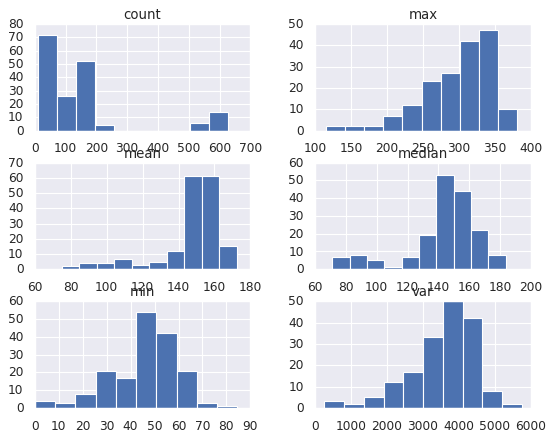

In [141]:
ostrate.hist()

In [142]:
q.loc[ostrate['mean']< 100]

count        min         max       mean     median         var
fsid stripe0                                                                
3    1           60  14.066719  112.033313  61.054311  63.259706  655.009995
     2           44  25.041059  106.878437  59.641240  57.781030  364.621894
     5           49  21.191476  129.679486  57.558841  47.908815  722.198254
     6           50  22.025246  155.057205  57.769058  52.094899  784.045983
     7           51  11.081765  148.410895  60.536413  53.261505  848.868886
     8           46  13.969455  141.310502  57.168966  52.654254  619.522459
     13          51  21.865913  119.864843  56.126642  52.537578  467.068027
     18          50  20.985151  133.549285  57.387244  44.457475  783.474404

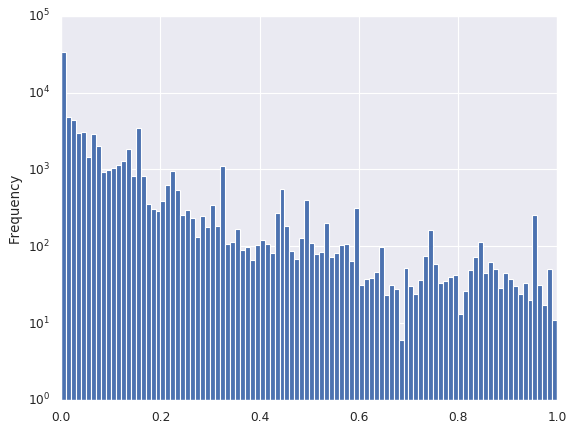

In [157]:
mss[ mss.gb < 1].gb.plot.hist(bins=100, logy=True)